Ce modele rerésente les interactions entres trois espèces co-dominantes (interactions types pierre-feuille-ciseaux)

L'ajout d'une troisième espèce permet de capturer les interactions cycliques inspirées de la dominance évolutive.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

### Matrice de gain

In [18]:
payoff_matrix = np.array([
    [0, -1, +1],  # H1 interactions
    [+1, 0, -1],  # H2 interactions
    [-1, +1, 0]   # H3 interactions
])

### Equation differentielle du modèle

In [19]:
def rps_model(t, y):
    H1, H2, H3 = y  # H1=pop 1, H2=pop 2, H3=pop 3
    dH1dt = payoff_matrix[0, 0]*H1 * (payoff_matrix[0, 1]*H2 + payoff_matrix[0, 2]*H3)
    dH2dt = payoff_matrix[1, 1]*H2 * (payoff_matrix[1, 0]*H1 + payoff_matrix[1, 2]*H3)
    dH3dt = payoff_matrix[2, 2]*H3 * (payoff_matrix[2, 0]*H1 + payoff_matrix[2, 1]*H2)
    return [dH1dt, dH2dt, dH3dt]

### Conditions initiales

In [29]:
H10 = 10   
H20 = 30   
H30 = 20
y0 = [H10, H20, H30]

### Résolution du modèle

In [32]:
t_span = (0, 5)
t_eval = np.linspace(*t_span, 1000)
solution = solve_ivp(rps_model, t_span, y0, t_eval=t_eval, method='RK45')
t = solution.t
H1, H2, H3 = solution.y

### Représentation graphique

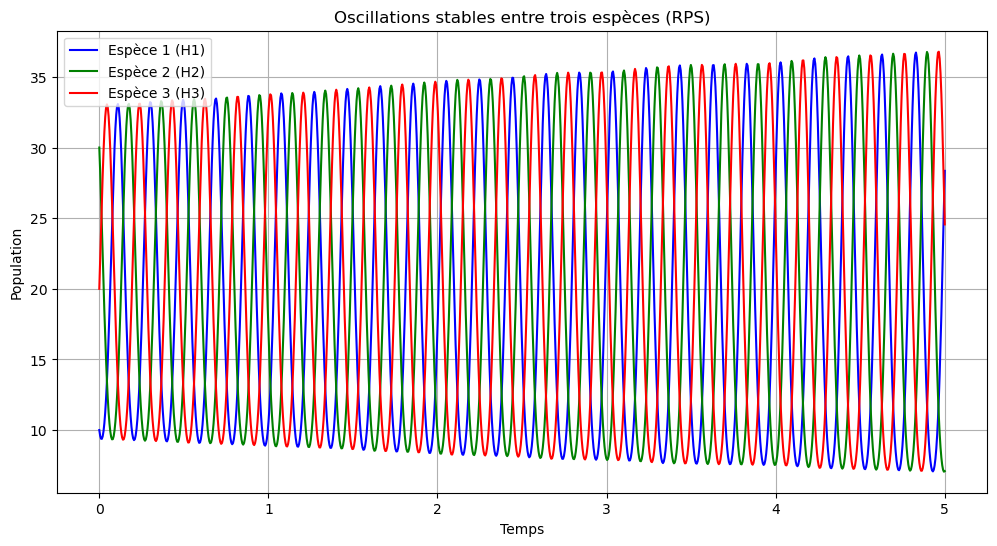

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(t, H1, label="Espèce 1 (H1)", color="blue")
plt.plot(t, H2, label="Espèce 2 (H2)", color="green")
plt.plot(t, H3, label="Espèce 3 (H3)", color="red")
plt.title("Oscillations stables entre trois espèces (RPS)")
plt.xlabel("Temps")
plt.ylabel("Population")
plt.legend()
plt.grid()
plt.show()

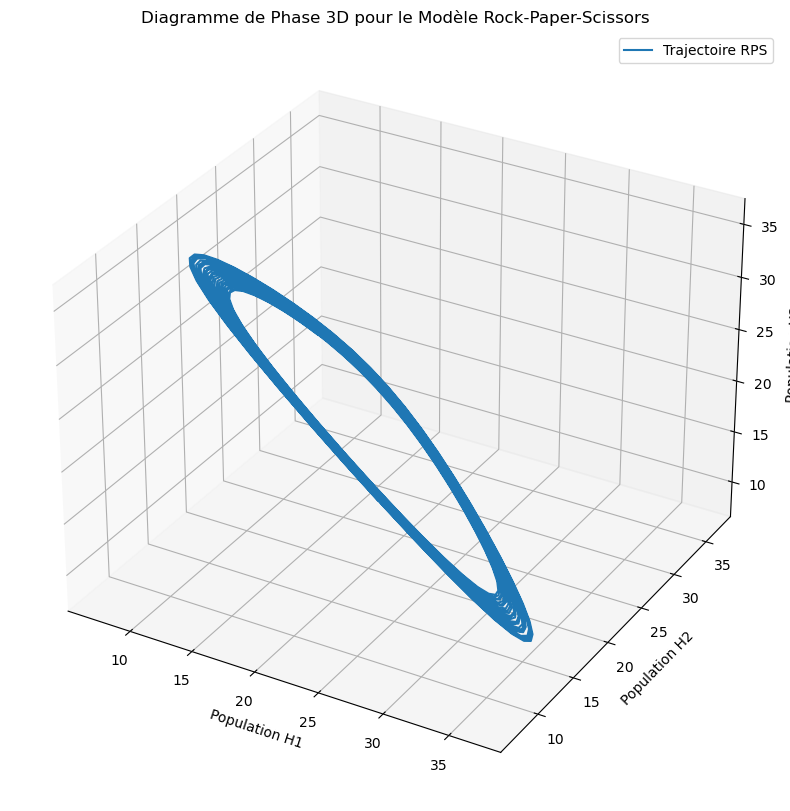

In [34]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.plot(H1, H2, H3, label='Trajectoire RPS')
ax.set_xlabel('Population H1')
ax.set_ylabel('Population H2')
ax.set_zlabel('Population H3')
ax.legend()
plt.title("Diagramme de Phase 3D pour le Modèle Rock-Paper-Scissors")

plt.show()